# 2.0 Notebook 2: Exploratory Data Analysis

We have assessed our data and have a good intuition. We take a closer look how the data looks now visually.

## 2.1 Objective

Exploratory data analysis (EDA) is a important step which involes after feature engineering. It is necessary to understand the data in both descriptively and visually to get a full grasp on our data with out making any unnecessary presumption. Before begin with model building it is necessary to understand the data in-depth to avoid any future errors.

Main motive of EDA is to:

> understand data using summary statistics and visualizations, find out insights about data, quality of data
  Before moving forward to data preprocessing we need to have overall picture of our data

Descriptive statistics is the method of drawing brief discription of data using simple numerics. Few common metrics used are mean, standard deviation, and correlation.

Visualization is the process of representing the data into simple plots and charts like bar plot , histogram, etc. 

## 2.2 Descriptive statistics

Summary statistics is the process to describe the data.

In [1]:
# import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("data/smartphone-data.csv",delimiter = ",")

Since the __activity columns is object type__, and our logistic regression would not be able to apprehend it. Therefor we must need to convert this column into numerical for each class, we can use __LabelEncoder__ to do do our job.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
df['Activity'].sample(5)

6735    3
6689    0
7286    3
559     1
6850    1
Name: Activity, dtype: int32

In [5]:
# check for correalation between different variables

feature_columns = df.columns[:-1]
corr_values = df[feature_columns].corr()

In [6]:
#remove values bwlow the diagonal
trill_index = np.tril_indices_from(corr_values)

In [7]:
# change unused columns to NaN
for coor in zip(*trill_index):
    corr_values.iloc[coor[0],coor[1]] = np.NaN

In [8]:
# stack the data into dataframe
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'Feature 1',
                                'level_1':'Feature 2',
                                0:'correlation'}))

In [9]:
# since the correalation values are in the range of -1 t0 1. Therefor we add another column for absolute values for the corr.
corr_values['abs_correlation'] = corr_values['correlation'].abs()

In [10]:
corr_values

,Feature 1,Feature 2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


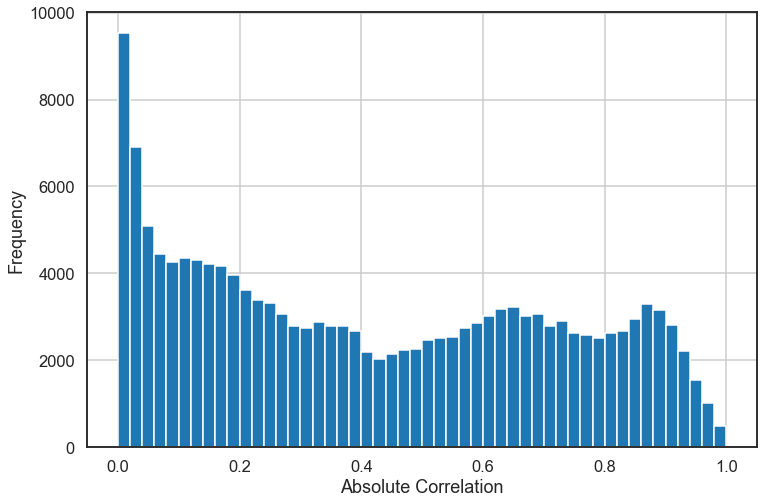

In [11]:
# plot the histogram or frequency count for each unique correaltion
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [12]:
# the features that are highly correlated
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,Feature 1,Feature 2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


These columns have very high correaltion which means that one column can be used instead of the other. For eg area and volume of a object will have high correlation with each other since they are both interelated.

> In the next Section we will train our model and try to predict the outcomes, using Logistic Regression.